# 1. Math Drills

Give an example of a binary relation on a set which is

1. Reflexive and symmetric, but not transitive  
2. Reflexive, but neither symmetric nor transitive  
3. Symmetric, but neither reflexive nor transitive  
4. Transitive, but neither reflexive nor symmetric  

Recall the definitions from the lectures if you need to! 

1) Reflexivity: $a \ge a$ for every $a \in M$  
2) Antisymmetry: If $a\ge b$ and $b \ge a$, then $a = b$  
3) Transitivity: If $a \ge b$ and $b \ge c$, then $a \ge c$ 

In [ ]:
#1. 
#2. 
#3. 
#4. 

# Exercise 2: A bunch of Math!

## 2.0 Polynomial

Consider the polynomial

$$
p(x)
= a_0 + a_1 x + a_2 x^2 + \cdots a_n x^n
= \sum_{i=0}^n a_i x^i \tag{1}
$$

Write a function `p` such that `p(x, coeff)` that computes the value in given a point `x` and a list of coefficients `coeff`.

```
p(5, [1, 1]) = 1 + 5 = 6
p(5, [2, 1, 1]) = 2 + 5 + 25 = 31
```

In [127]:
p = lambda x, coeff: sum([coeff[i] * x ** i for i in range(len(coeff))])

# or
#def p(x, coeff):
#    return sum([coeff[i] * x ** i for i in range(len(coeff))])

# or
#total = 0
#for i in range(len(coeff)):
#    total += coeff[i] * x ** i
#return total

In [128]:
print(p(5, [1, 1]))     # 1 + 5 = 6
print(p(5, [2, 1, 1]))  # 2 + 5 + 25 = 32 (not 31)

6
32


# 2.1 Variance

Define a function named `var` that takes a list of numbers and computes the variance. The variance is:

$$variance(x) = ∑_i(x_i − average(x))^2$$

Don't cheat and use `numpy.var`! You should only use that function to test that your function is correct

In [7]:
import numpy

list = numpy.random.uniform(2,5,100)

def var(list):
    avg = sum(list) / len(list)
    return sum( [(i - avg) ** 2 for i in list] ) / len(list)

In [8]:
print(numpy.var(list))
print(var(list))

0.6042195673482001
0.6042195673482004


# 2.2 RMSE

Calculate the root mean squared error (RMSE) of a machine learning model's output. The function takes in two lists: one with actual values, one with predictions. The formula for RMSE is:

$$RMSE(y_1, y_2) = \sqrt{\dfrac{1}{N} \sum_{i=1}^N (y_{1i} - y_{2i})^2}$$

```
    rmse([1, 2], [1, 2]) = 0
    rmse([1, 2, 3], [3, 2, 1]) = 1.63
```

You can use 

```
sklearn.metrics.mean_squared_error(y_actual, y_predicted, squared=False)
```

To test your function

In [14]:
import math

def rmse(l1, l2):
    if len(l1) == len(l2):
        return math.sqrt( 
            sum( [ ( l1[i] - l2[i] ) ** 2 for i in range(len(l1)) ] ) 
            / len(l1) )
    return "lists must be the same length"   

In [15]:
import sklearn.metrics
print(sklearn.metrics.mean_squared_error([1, 2], [1, 2], squared=False))
print(sklearn.metrics.mean_squared_error([1, 2, 3], [3, 2, 1], squared=False))

print(rmse([1, 2], [1, 2]))        # 0
print(rmse([1, 2, 3], [3, 2, 1]))  # 1.63

0.0
1.632993161855452
0.0
1.632993161855452


# 2.3 Jaccard Similarity

The Jaccard similarity between two sets is the size of intersection divided by the size of union. Write a function that computes it:

$$jaccard(A, B) = \dfrac{|A \cap B|}{|A \cup B|}$$


```
jaccard({'a', 'b', 'c'}, {'a', 'd'}) = 1 / 4
```



In [129]:
jaccard = lambda s1, s2: len(s1.intersection(s2)) / len(s1.union(s2))

In [130]:
jaccard({'a', 'b', 'c'}, {'a', 'd'}) # 1/4 or 0.25

0.25

# Exercise 3

First, write a function that returns one realization of the following random device

1. Flip an unbiased coin 10 times.  
1. If a head occurs `k` or more times consecutively within this sequence at least once, pay one dollar.  
1. If not, pay nothing.  


Second, write another function that does the same task except that the second rule of the above random device becomes

- If a head occurs `k` or more times within this sequence, pay one dollar.  


Use no import besides `from numpy.random import uniform`.

In [65]:
import numpy
from numpy.random import uniform

def consecutive_k(k):
    flips = numpy.random.uniform(0,1,10)
    heads = [ 1 if x > 0.5 else 0 for x in flips ]
    # print for demo only
    print(heads)

    cnstv = 0
    for i in heads:
        cnstv = cnstv + 1 if i == 1 else 0
        if cnstv >= k:
            return "pay one dollar"
    return "pay nothing"


def total_k(k):
    flips = numpy.random.uniform(0,1,10)
    heads = [ 1 if x > 0.5 else 0 for x in flips ]
    # print for demo only
    print(heads)

    if sum(heads) >= k:
        return "pay one dollar"
    return "pay nothing"
    

In [69]:
print(consecutive_k(4))
print(total_k(4))

[0, 1, 1, 0, 1, 1, 1, 1, 0, 0]
pay one dollar
[1, 1, 1, 0, 0, 0, 0, 1, 1, 0]
pay one dollar


# Exercise 4: Logistic Map fixed point

The **Logistic Map** is a famous function from Chaos Theory which is defined as:

$$x_{t+1} = r \cdot x_t(1−x_t)$$

with the conditions:

$$x_0 ∈ [0,1], r ∈[0,4]$$

Write a lambda $logistic(x, r)$, that's successively applied to itself through a second function `logistic_n_times(x0, f, r, n)`

Make a few runs of this for various values of `x0` and `r`. Answer the following:

- Can you find a fixed point? 

- At what values of `r` are there fixed points? 

- Are there any ranges of input for which the function is an attractor?

In [102]:
f = lambda x, r : r * x*(1 - x)

def logistic_n_times(x0, f, r, n):
    lx = []
    x = x0
    for i in range(n):
      lx.append(x)
      x = f(x,r)
    return lx

In [106]:
#logistic_n_times(x0, f, r, 100)

# fixed points when r < ~3 (for any value of x0)
print(logistic_n_times(0.5, f, 2.9, 100)[-5:])

# jump between points when  r > ~3 (for any value of x0)
print(logistic_n_times(0.5, f, 3.1, 100)[-5:])

[0.6551754339508017, 0.655169695624723, 0.6551748601232192, 0.6551702120786441, 0.6551743953220589]
[0.7645665199587258, 0.5580141252024804, 0.764566519958672, 0.5580141252025687, 0.7645665199586402]


# Exercise 5 (stretch): Famous Chaos Theory Plot 

There is a famous plot in chaos theory of the logistic map that relates values of the attractors in $x_t$ for values of $r$, detailing where the function tends to "end up" for each value of $r$.

<img src="logistic map.png" style="width: 400px;">

Reproduce this plot using the `matplotlib` package.

**Hint:** Produce samples from the function to fill arrays on the x and y axis!

**Hint:** Take the final 50 values in a series of data points produced by the function!

In [120]:
import numpy as np

# make a lsit of r values
r = np.linspace(0,4,1000)

# not necessary since we use only the last values (xt+n)
x0 = np.linspace(0,1,1000) 

# generate lists of r and xt+n
rs, xs = [], []
for i in range(len(r)):
    rs.append(r[i])
    # call the logistic map function
    xs.append(logistic_n_times(x0[i], f, r[i], 100)[-50:])

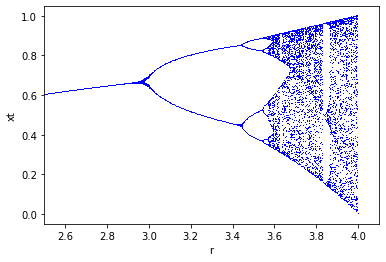

In [125]:
import matplotlib.pyplot as plt

# make the graph
def make_fig():
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.set_xlim(2.5,4.1) # adjust zoom
    ax.set_xlabel('r')
    ax.set_ylabel('xt')
    return fig, ax

fig, ax = make_fig()
plt.plot(rs,xs, ',b')
plt.show()